<a href="https://colab.research.google.com/github/Pondorasti/DS-2.1/blob/main/Class%20Work/PCA_%26_KMeans%20(Wholesale_Customer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Apply PCA and Clustering to Wholesale Customer Data

In this homework, we'll examine the [**_Wholesale Customers Dataset_**](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers), which we'll get from the UCI Machine Learning Datasets repository.  This dataset contains the purchase records from clients of a wholesale distributor.  It details the total annual purchases across categories seen in the data dictionary below:

**Category** | **Description** 
:-----:|:-----:
CHANNEL| 1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)
REGION| Geographic region of Portugal for each order (Nominal)
FRESH| Annual spending (m.u.) on fresh products (Continuous);
MILK| Annual spending (m.u.) on milk products (Continuous); 
GROCERY| Annual spending (m.u.)on grocery products (Continuous); 
FROZEN| Annual spending (m.u.)on frozen products (Continuous) 
DETERGENTS\_PAPER| Annual spending (m.u.) on detergents and paper products (Continuous) 
DELICATESSEN| Annual spending (m.u.)on and delicatessen products (Continuous); 

**_TASK:_** Read in `wholesale_customers_data.csv` from the `datasets` folder and store in a dataframe.  Store the `Channel` column in a separate variable, and then drop the `Channel` and `Region` columns from the dataframe. Scale the data and use PCA to engineer new features (Principal Components).  Print out the explained variance for each principal component. 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Pondorasti/DS-2.1/main/Datasets/Wholesale%20customers.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
channel = df["Channel"]
region = df["Region"]
df = df.drop(columns=["Channel", "Region"])
channel

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [18]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [20]:
pca = PCA()
pca_data = pca.fit_transform(scaled_df)

percentage_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
pc_range = range(1, len(percentage_variance) + 1)
labels = ["PC" + str(x) for x in pc_range]

pca_df = pd.DataFrame(pca_data, columns=labels)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281,-0.007414
1,0.434420,-0.328413,0.319007,-0.178830,0.365579,0.054572
2,0.811143,0.815096,1.523416,-1.254082,-0.379054,-0.277539
3,-0.778648,0.652754,0.163012,0.380060,-0.276138,0.060718
4,0.166287,1.271434,0.066279,-0.826227,-0.394211,-0.026825
...,...,...,...,...,...,...
435,0.870602,2.220845,-0.605500,1.049263,0.423781,0.869495
436,-0.902520,1.676916,-1.418980,-0.572274,-0.257026,-0.226535
437,3.465704,-1.039838,-0.713161,0.033408,-0.538768,-0.085349
438,-0.918023,-0.030047,0.258408,-0.524578,-0.093215,-0.028943


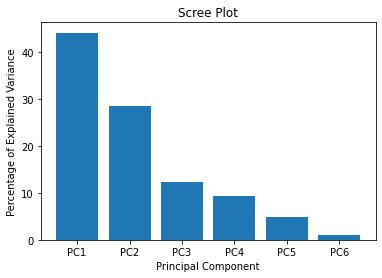

In [21]:
plt.bar(x=pc_range, height=percentage_variance, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

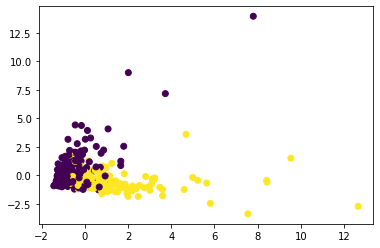

In [23]:
# for k, (i,j) in enumerate(zip(pca_df[:, 0], pca_df[:, 1])):
#     plt.scatter(i, j)

plt.scatter(pca_df["PC1"], pca_df["PC2"], c=channel)
plt.show()

## K-Means, but Without All the Supervision
 

**_Challenge:_** Use K-Means clustering on the `wholesale_customers` dataset, and then again on a version of this dataset transformed by PCA.  

1. Read in the data from the `wholesale_customers_data.csv` file contained within the datasets folder.  

2. Store the `Channel` column in a separate variable, and then drop the `Region` and `Channel` columns from the dataframe.  `Channel` will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.  

3.  Scale the data, fit a k-means object to it, and then visualize the data and the clustering.  

4.  Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.  

**Challenge:_** Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were.  Which did better--scaled data, or data transformed by PCA?



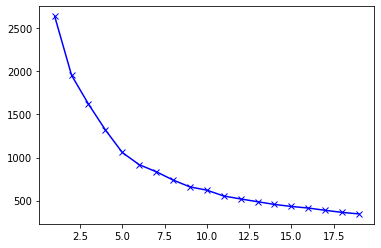

In [26]:
sum_sq_dist = []
K = range(1, 20)

for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(scaled_df)
  sum_sq_dist.append(km.inertia_)

plt.plot(K, sum_sq_dist, 'bx-')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(scaled_df)

clusters = kmeans.cluster_centers_
clusters

array([[-4.79916970e-01,  6.81814657e-01,  9.22793207e-01,
        -3.21811868e-01,  9.07245100e-01,  1.54326877e-01],
       [ 1.67032632e+00, -1.07977956e-01, -2.49633515e-01,
         1.09385904e+00, -4.17830521e-01,  2.58987677e-01],
       [ 1.96681731e+00,  5.17550306e+00,  1.28721685e+00,
         6.90059988e+00, -5.54861977e-01,  1.64784475e+01],
       [ 3.13830315e-01,  3.92190593e+00,  4.27561037e+00,
        -3.57419457e-03,  4.61816580e+00,  5.03365339e-01],
       [-2.38013516e-01, -3.81652438e-01, -4.32979840e-01,
        -1.66237178e-01, -3.94070381e-01, -1.94976684e-01]])

In [40]:
y_km = kmeans.fit_predict(pca_data)

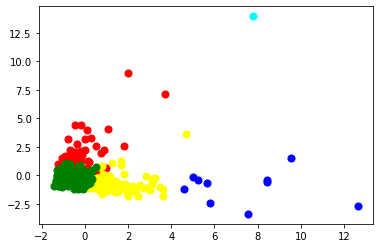

In [43]:
plt.scatter(pca_data[y_km == 0,0], pca_data[y_km == 0,1], s=50, color='red')
plt.scatter(pca_data[y_km == 1,0], pca_data[y_km == 1,1], s=50, color='blue')
plt.scatter(pca_data[y_km == 2,0], pca_data[y_km == 2,1], s=50, color='yellow')
plt.scatter(pca_data[y_km == 3,0], pca_data[y_km == 3,1], s=50, color='cyan')
plt.scatter(pca_data[y_km == 4,0], pca_data[y_km == 4,1], s=50, color='green')

plt.show()

In [44]:
confusion_matrix(y_km, channel)

array([[  0,  55,   8,   0,   0],
       [  0,   0,  10,   0,   0],
       [  0,   9,  87,   0,   0],
       [  0,   1,   0,   0,   0],
       [  0, 233,  37,   0,   0]])